# Flights Data Exploration

This project is done to explore the flight data to analyze possible factors that affect delays in departure or arrival of a flight. The flight data used is a real-world dataset containing flights data from the US Department of Transportation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import seaborn as sns


In [2]:
df_flights = pd.read_csv('data/flights.csv')
df_flights.head()

Year  Month  DayofMonth  DayOfWeek Carrier  OriginAirportID  \
0  2013    9.0        16.0        1.0      DL          15304.0   
1  2013    9.0        23.0        1.0      WN          14122.0   
2  2013    9.0         7.0        6.0      AS          14747.0   
3  2013    7.0        22.0        1.0      OO          13930.0   
4  2013    5.0        16.0        4.0      DL          13931.0   

              OriginAirportName  OriginCity OriginState  DestAirportID  \
0           Tampa International       Tampa          FL        12478.0   
1      Pittsburgh International  Pittsburgh          PA        13232.0   
2  Seattle/Tacoma International     Seattle          WA        11278.0   
3  Chicago O'Hare International     Chicago          IL        11042.0   
4         Norfolk International     Norfolk          VA        10397.0   

                            DestAirportName    DestCity DestState  CRSDepTime  \
0             John F. Kennedy International    New York        NY      1539.0   
1              Chicago Midway International     Chicago        IL       710.0   
2         Ronald Reagan Washington National  Washington        DC       810.0   
3           Cleveland-Hopkins International   Cleveland        OH       804.0   
4  Hartsfield-Jackson Atlanta International     Atlanta        GA       545.0   

   DepDelay  DepDel15  CRSArrTime  ArrDelay  ArrDel15  Cancelled  
0       4.0       0.0      1824.0      13.0       0.0        0.0  
1       3.0       0.0       740.0      22.0       1.0        0.0  
2      -3.0       0.0      1614.0      -7.0       0.0        0.0  
3      35.0       1.0      1027.0      33.0       1.0        0.0  
4      -1.0       0.0       728.0      -9.0       0.0        0.0

The dataset contains observations of US domestic flights in 2013, and consists of the following fields:

- **Year**: The year of the flight (all records are from 2013)
- **Month**: The month of the flight
- **DayofMonth**: The day of the month on which the flight departed
- **DayOfWeek**: The day of the week on which the flight departed - from 1 (Monday) to 7 (Sunday)
- **Carrier**: The two-letter abbreviation for the airline.
- **OriginAirportID**: A unique numeric identifier for the departure aiport
- **OriginAirportName**: The full name of the departure airport
- **OriginCity**: The departure airport city
- **OriginState**: The departure airport state
- **DestAirportID**: A unique numeric identifier for the destination aiport
- **DestAirportName**: The full name of the destination airport
- **DestCity**: The destination airport city
- **DestState**: The destination airport state
- **CRSDepTime**: The scheduled departure time
- **DepDelay**: The number of minutes departure was delayed (flight that left ahead of schedule have a negative value)
- **DelDelay15**: A binary indicator that departure was delayed by more than 15 minutes (and therefore considered "late")
- **CRSArrTime**: The scheduled arrival time
- **ArrDelay**: The number of minutes arrival was delayed (flight that arrived ahead of schedule have a negative value)
- **ArrDelay15**: A binary indicator that arrival was delayed by more than 15 minutes (and therefore considered "late")
- **Cancelled**: A binary indicator that the flight was cancelled

In [3]:
# found one row with all columns as null except for year (row no. 182883)
df_flights[df_flights.Month.isna()]
df_flights.drop([182883], inplace=True)

In [4]:
df_flights.isnull().sum()
# col depdel15 has 1837 null values
df_flights["DepDel15"].value_counts()

0.0    144612
1.0     36434
Name: DepDel15, dtype: int64

In [5]:
df_flights[df_flights["DepDel15"].isna()][["DepDelay", "DepDel15"]].head()

DepDelay  DepDel15
171       0.0       NaN
359       0.0       NaN
429       0.0       NaN
545       0.0       NaN
554       0.0       NaN

In [6]:
# as depdel15 is based on the value of depdelay (if depdelay is more than 15 then depdel15 is 1,else 0)
df_flights["DepDel15"] = np.where(df_flights["DepDelay"]>15, 1, 0)

# same for arrdel15 and arrdelay
df_flights["ArrDel15"] = np.where(df_flights["ArrDelay"]>15, 1, 0)

In [7]:
df_flights.describe()

Year          Month     DayofMonth      DayOfWeek  OriginAirportID  \
count  182883.0  182883.000000  182883.000000  182883.000000    182883.000000   
mean     2013.0       6.978407      15.801414       3.900286     12747.044597   
std         0.0       1.981503       8.803735       1.987856      1502.075996   
min      2013.0       4.000000       1.000000       1.000000     10140.000000   
25%      2013.0       5.000000       8.000000       2.000000     11292.000000   
50%      2013.0       7.000000      16.000000       4.000000     12892.000000   
75%      2013.0       9.000000      23.000000       6.000000     14057.000000   
max      2013.0      10.000000      31.000000       7.000000     15376.000000   

       DestAirportID     CRSDepTime       DepDelay       DepDel15  \
count  182883.000000  182883.000000  182883.000000  182883.000000   
mean    12737.232898    1324.930825      10.297174       0.191259   
std      1502.541455     470.657208      35.355153       0.393293   
min     10140.000000       1.000000     -63.000000       0.000000   
25%     11292.000000     920.000000      -4.000000       0.000000   
50%     12892.000000    1320.000000      -1.000000       0.000000   
75%     14057.000000    1723.000000       9.000000       0.000000   
max     15376.000000    2359.000000    1425.000000       1.000000   

          CRSArrTime       ArrDelay       ArrDel15      Cancelled  
count  182883.000000  182883.000000  182883.000000  182883.000000  
mean     1505.083589       6.473374       0.197629       0.010695  
std       492.846288      37.940769       0.398212       0.102864  
min         1.000000     -75.000000       0.000000       0.000000  
25%      1120.000000     -11.000000       0.000000       0.000000  
50%      1528.000000      -3.000000       0.000000       0.000000  
75%      1918.000000      10.000000       0.000000       0.000000  
max      2359.000000    1440.000000       1.000000       1.000000

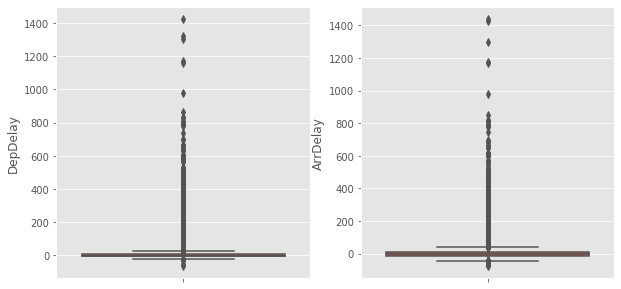

In [8]:
# check for outliers in DepDelay and ArrDelay
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
sns.boxplot(y=df_flights["DepDelay"], ax=ax1);
sns.boxplot(y=df_flights["ArrDelay"], ax=ax2);
plt.show()

In [9]:
# we will trim the outliers based on 1 and 90th percentile of the data for depdelay and arrdelay
DepDelay_1pct = df_flights["DepDelay"].quantile(0.01)
DepDelay_90pct = df_flights["DepDelay"].quantile(0.90)
# filter depdelay values that are more than 1 and less than 90 percentiles
df_flights = df_flights[(df_flights.DepDelay > DepDelay_1pct) & (df_flights.DepDelay < DepDelay_90pct)]

ArrDelay_1pct = df_flights["ArrDelay"].quantile(0.01)
ArrDelay_90pct = df_flights["ArrDelay"].quantile(0.90)
# filter arrdelay values that are more than 1 and less than 90 percentiles
df_flights = df_flights[(df_flights.ArrDelay > ArrDelay_1pct) & (df_flights.ArrDelay < ArrDelay_90pct)]

In [10]:
# mean depature and arrival delays
print(f'Mean Departure Delay: {df_flights.DepDelay.mean()}')
print(f'Mean Arrival Delay: {df_flights.ArrDelay.mean()}')

Mean Departure Delay: -0.13060335559763347
Mean Arrival Delay: -5.66058386566512


## Flight Carriers

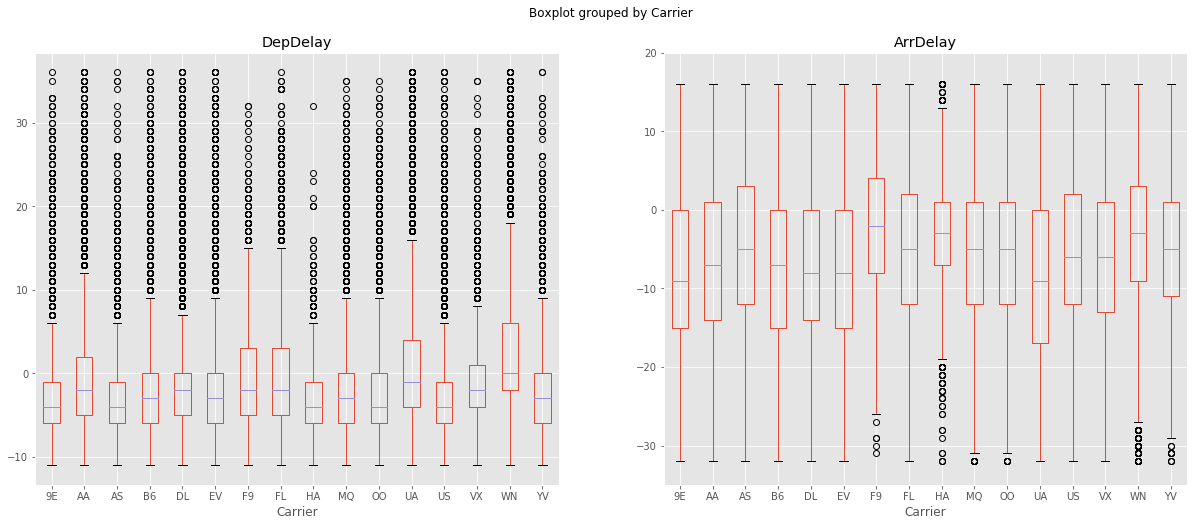

In [11]:
# arrival and departure performance by carriers
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
df_flights.boxplot(column="DepDelay", by="Carrier", ax=ax1)
df_flights.boxplot(column="ArrDelay", by="Carrier", ax=ax2)
plt.ylim(-35,20);

We can see that from the different carriers, HA has the best performance based on departure with most of the flights departing on time, with fewer delays compared to the other carriers. HA is also the best performing carrier in terms of arrival performance. It has more flights arriving on time and with shorter delays. 

In [12]:
# for flights that have arrived 15 minutes after scheduled time (which we have considered them to be late)
arrival_delays = df_flights[df_flights["ArrDelay"]>15]
carrier_arrdelay_performance = arrival_delays.groupby("Carrier")["ArrDelay"].agg(["sum", "mean", "count"])
# for flights that have departed after scheduled time
departure_delays = df_flights[df_flights["DepDelay"]>15]
carrier_depdelay_performance = departure_delays.groupby("Carrier")["DepDelay"].agg(["sum", "mean", "count"])

In [13]:
print("Worst arrival performance by carriers")
print(carrier_arrdelay_performance.sort_values(by=["sum","count"], ascending=False).head(3),'\n')

print("Worst departure performance by carriers")
print(carrier_depdelay_performance.sort_values(by=["sum","count"], ascending=False).head(3))

Worst arrival performance by carriers
            sum  mean  count
Carrier                     
WN       5952.0  16.0    372
DL       2560.0  16.0    160
AA       2240.0  16.0    140 

Worst departure performance by carriers
             sum       mean  count
Carrier                           
WN       50342.0  20.657366   2437
UA       22866.0  22.395690   1021
DL       17268.0  21.531172    802


We can see that WN is the worst performing carrier in terms of delays. It has the most number of arrival and departure delays, 372 and 2437 respectively. It also has the highest amount of total delays in minutes compared to other carriers.

## Day of the Week

In [14]:
arri_delays_daysofweek = arrival_delays.groupby("DayOfWeek")["ArrDelay"].agg(["count"])
print(f'Arrival delays based on the day of the week \n{arri_delays_daysofweek.sort_values(["count"], ascending=False)}\n')

dep_delays_daysofweek = departure_delays.groupby("DayOfWeek")["DepDelay"].agg(["count"])
print(f'Departure delays based on the day of the week \n{dep_delays_daysofweek.sort_values(["count"], ascending=False)}')

Arrival delays based on the day of the week 
           count
DayOfWeek       
4.0          230
1.0          217
5.0          215
3.0          208
2.0          182
7.0          168
6.0          121

Departure delays based on the day of the week 
           count
DayOfWeek       
4.0         1186
1.0         1122
5.0         1118
3.0         1024
2.0         1000
7.0          942
6.0          870


More flights were found delayed on arrival and departure  on thursdays, followed by mondays and then fridays.

## Airport

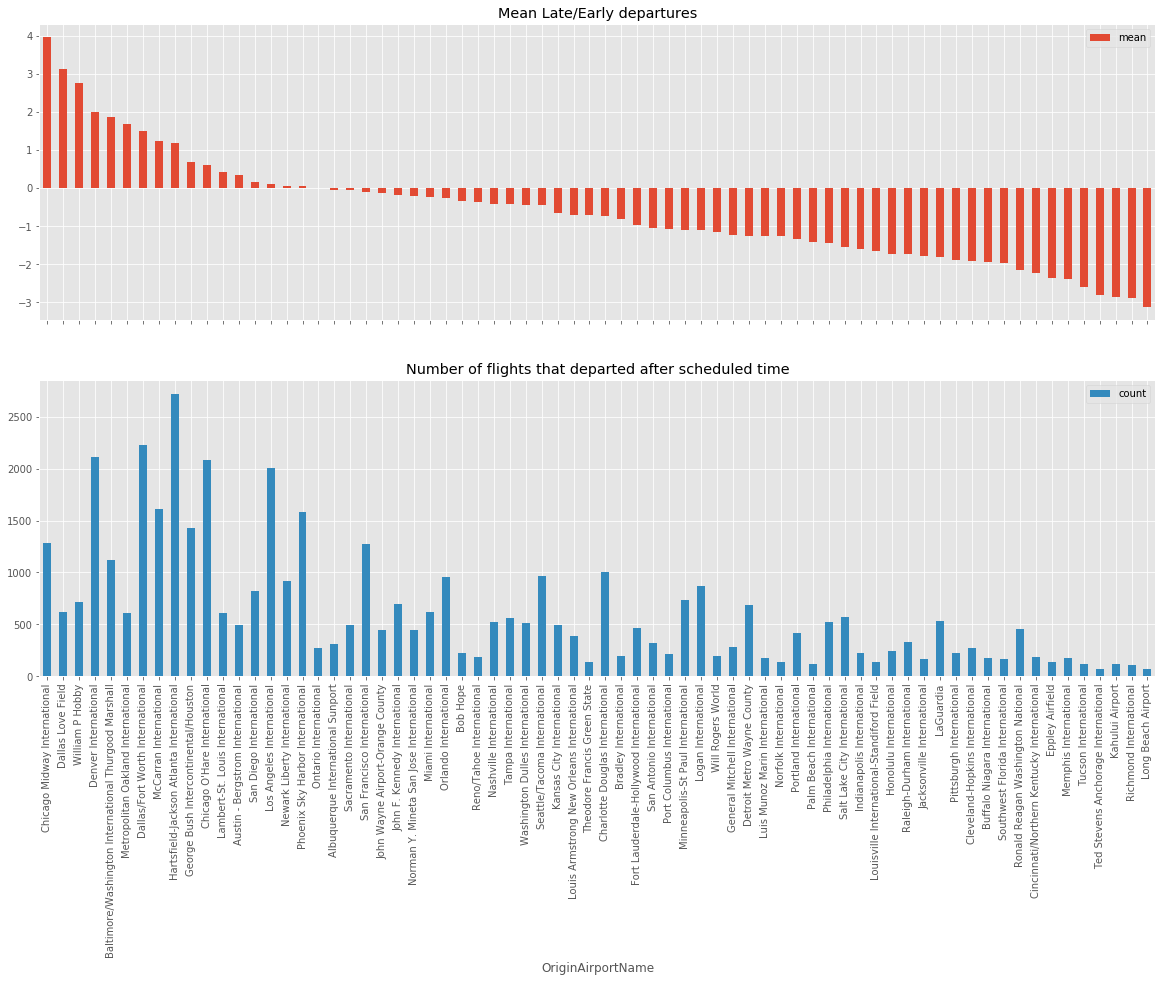

In [15]:
dep_delays_airport_mean = df_flights.groupby("OriginAirportName")["DepDelay"].agg(["mean"])
airport_depdelays = df_flights[df_flights["DepDelay"]>0]
dep_delays_airport_count = airport_depdelays.groupby("OriginAirportName")["DepDelay"].agg(["count"])
dep_delays_airport = pd.merge(dep_delays_airport_mean, dep_delays_airport_count, left_index=True, right_index=True)

dep_delays_airport = dep_delays_airport.sort_values(by="mean",ascending=False)
axes = dep_delays_airport.plot.bar(subplots=True, figsize=(20,12));
axes[0].set_title("Mean Late/Early departures");
axes[1].set_title("Number of flights that departed after scheduled time");

Chicago Midway International airport has the highest mean departure delay. This could mean that the departure delays were for longer durations.
Hartsfield-Jackson Atlanta International airport has the most number of flights that had a delay before departing the airport.
Long Beach Airport had the least number of flights with delayed departures and also had the lowest mean departure delay which is caused by flights deparating before scheduled time.

## Late Departures = Late Arrivals

In [16]:
flight_pct = round(df_flights[(df_flights["DepDelay"]>0) & (df_flights["ArrDelay"]>0)].shape[0] / df_flights.shape[0] * 100,2)

15.8% of flights that departed late were late on arrival, so there is no corelation in late departures resulting in late arri

## Route

In [17]:
late_flights = df_flights[df_flights["ArrDel15"]==1]
route = late_flights.groupby(["OriginAirportName", "DestAirportName"])["ArrDel15"].agg(["count"])
route.sort_values(by="count",ascending=False)

count
OriginAirportName                DestAirportName                                
San Francisco International      Los Angeles International                    11
Orlando International            Hartsfield-Jackson Atlanta International      6
Chicago O'Hare International     Los Angeles International                     5
Dallas/Fort Worth International  San Antonio International                     5
Los Angeles International        Phoenix Sky Harbor International              5
...                                                                          ...
John Wayne Airport-Orange County George Bush Intercontinental/Houston          1
                                 McCarran International                        1
                                 Newark Liberty International                  1
                                 Phoenix Sky Harbor International              1
William P Hobby                  Will Rogers World                             1

[896 rows x 1 columns]

San Francisco International Airport to Los Angeles Airport has the most number of late arrivals (flights delayed by more than 15 minutes)

In [18]:
arr_delayed_flights = df_flights.groupby(["OriginAirportName", "DestAirportName"])["ArrDelay"].agg(["mean"]).sort_values(by="mean", ascending=False)
arr_delayed_flights

mean
OriginAirportName                 DestAirportName                                     
Theodore Francis Green State      Southwest Florida International            12.000000
Cleveland-Hopkins International   Louis Armstrong New Orleans International  10.666667
Phoenix Sky Harbor International  Raleigh-Durham International               10.600000
Charlotte Douglas International   General Mitchell International             10.000000
Indianapolis International        Philadelphia International                 10.000000
...                                                                                ...
Ronald Reagan Washington National William P Hobby                           -22.000000
Bradley International             Los Angeles International                 -24.000000
Denver International              Kahului Airport                           -25.500000
Eppley Airfield                   LaGuardia                                 -25.500000
Indianapolis International        Logan International                       -26.000000

[2475 rows x 1 columns]

Theodore Francis Green State Airport to Southwest Florida International Airport has the highest average arrival delay.